### 감성분석

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [32]:
df = pd.read_csv('블로그내용.csv',header=None) 
df.rename({0:'링크',1:'내용',2:'해시태그'},axis=1, inplace=True)
label_ = pd.read_csv('검색링크.csv')['검색키워드']
df['검색키워드'] = label_
df.rename({0:'링크',1:'내용',2:'해시태그'},axis=1, inplace=True)
df.dropna(axis=0, inplace = True)
df.reset_index(inplace=True, drop = True)

In [33]:
df 

,링크,내용,해시태그,검색키워드
0,https://blog.naver.com/hanke/223148038433,대구가볼만한곳 대구 이월드 물놀이 아쿠아빌리지 아쿠아플레이존 오늘 첫번째 포스팅은 ...,대구가볼만한곳 대구이월드 이월드 대구물놀이 이월드아쿠아빌리지 이월드아쿠아플레이존,이월드
1,https://blog.naver.com/kkulee/222972014637,#내돈내산 해마다 이맘때쯤이 되면 대구 이월드 야경이 예쁘다는 소식을 접해서 한 번...,내돈내산 대구이월드 자유이용권 입장권할인 일루미네이션 야간 야경 대구놀거리,이월드
2,https://blog.naver.com/eworld_dg/223233061377,안녕하세요 이월드입니다. 이월드 페스티브 마켓 10월 매주 주말 마켓 운영시안 13...,이월드 이월드맛집 대구이월드 이월드할인 이월드간식 대구가볼만한곳 대구핫플 대구아이와...,이월드
3,https://blog.naver.com/max_ad-min/223231148211,대구이월드 연간회원 끝나기전에 뽕뽑기 편입니다. 2주만에 3번의 방문으로 뽕은 잘 ...,애슐리 애슐리퀸즈 대구 이월드 대구이월드점 83타워 연간회원할인 10프로할인,이월드
4,https://blog.naver.com/saddyblue0/223127190176,물놀이가 하고싶어서 여름만 기다렸는데 올해 첫 물놀이는 대구 아이와 가볼만한 곳 이...,대구가볼만한곳 대구아이와가볼만한곳 대구수영장 대구물놀이 이월드수영장 이월드 이월드아...,이월드
...,...,...,...,...
7555,https://blog.naver.com/simple053/222927063253,대구 수성구에 위치한 대구은행본점 지하1층에 대구금융박물관이있어요 저는 자차이용하지...,첫글 대구은행 대구은행금융박물관 대구아이랑가기좋은곳 대구어린이체험 은행원체험,대구은행 금융박물관
7556,https://blog.naver.com/jdchild1/222941425851,#중동 어린이집 견학 #7세반 #대구은행 금융 박물관 #표준보육과정 누리과정 오늘은...,중동 7세반 대구은행 표준보육과정 누리과정,대구은행 금융박물관
7557,https://blog.naver.com/roopretel77/222958617517,/대구은행 금융박물관/ 대구은행 금융박물관에 다녀왔다 대구은행 본점 지하에는 금융박...,대구은행 대구은행금융박물관 대구아이와가볼만한곳 대구아이체험 수성구아이와가볼만한곳,대구은행 금융박물관
7558,https://blog.naver.com/ssgk6611/222904573937,대구은행 금융박물관을 방문하여 세계여러나라의 화폐에 들어가는 다양한그림을 찾아보았습...,대구유치원 신세계유치원 대구신세계유치원 수성구유치원 수성1가유치원 대구은행 금융박물...,대구은행 금융박물관


In [34]:
from konlpy.tag import Okt
okt = Okt()
senti = pd.read_csv('./knu_sentiment_lexicon.csv') # 감성사전

In [35]:
df['내용'] = tqdm(df['내용'].apply(lambda x:okt.nouns(x)))

100%|██████████████████████████████████████████████████████████████████████████| 7560/7560 [00:00<00:00, 758369.33it/s]


In [36]:
df['내용'] = df['내용'].apply(lambda x:' '.join(x))
df['data'] = df['내용'] + ' ' + df['해시태그']

In [37]:
df

,링크,내용,해시태그,검색키워드,data
0,https://blog.naver.com/hanke/223148038433,대구 곳 대구 이월드 물놀이 아쿠아 아쿠아 플레이 존 오늘 첫 포스팅 대구 곳 물놀...,대구가볼만한곳 대구이월드 이월드 대구물놀이 이월드아쿠아빌리지 이월드아쿠아플레이존,이월드,대구 곳 대구 이월드 물놀이 아쿠아 아쿠아 플레이 존 오늘 첫 포스팅 대구 곳 물놀...
1,https://blog.naver.com/kkulee/222972014637,쯤 대구 이월드 야경 소식 접 번 야간 자유 이용권 입장권 할인 루미 네이션 축제 ...,내돈내산 대구이월드 자유이용권 입장권할인 일루미네이션 야간 야경 대구놀거리,이월드,쯤 대구 이월드 야경 소식 접 번 야간 자유 이용권 입장권 할인 루미 네이션 축제 ...
2,https://blog.naver.com/eworld_dg/223233061377,이월드 이월드 페 스티브 마켓 주말 마켓 운영 시안 카멜 앞 어드벤처 광장 야외 감...,이월드 이월드맛집 대구이월드 이월드할인 이월드간식 대구가볼만한곳 대구핫플 대구아이와...,이월드,이월드 이월드 페 스티브 마켓 주말 마켓 운영 시안 카멜 앞 어드벤처 광장 야외 감...
3,https://blog.naver.com/max_ad-min/223231148211,대구 이월드 연간 회원 뽕 뽑기 편입 니 주 번의 방문 뽕 애슐리 퀸즈 이용 연간 ...,애슐리 애슐리퀸즈 대구 이월드 대구이월드점 83타워 연간회원할인 10프로할인,이월드,대구 이월드 연간 회원 뽕 뽑기 편입 니 주 번의 방문 뽕 애슐리 퀸즈 이용 연간 ...
4,https://blog.naver.com/saddyblue0/223127190176,물놀이 여름 올해 첫 물놀이 대구 아이 곳 이월드 아쿠아 수영장 시작 물놀이 놀이기...,대구가볼만한곳 대구아이와가볼만한곳 대구수영장 대구물놀이 이월드수영장 이월드 이월드아...,이월드,물놀이 여름 올해 첫 물놀이 대구 아이 곳 이월드 아쿠아 수영장 시작 물놀이 놀이기...
...,...,...,...,...,...
7555,https://blog.naver.com/simple053/222927063253,대구 수성구 위치 대구 은행 본점 지하 층 금융 박물관 저 자 차이 지하철 타고 이...,첫글 대구은행 대구은행금융박물관 대구아이랑가기좋은곳 대구어린이체험 은행원체험,대구은행 금융박물관,대구 수성구 위치 대구 은행 본점 지하 층 금융 박물관 저 자 차이 지하철 타고 이...
7556,https://blog.naver.com/jdchild1/222941425851,어린이집 견학 금융 박물관 누리 과정 오늘 어린이집 곳 위치 대구 은행 점지 금융 ...,중동 7세반 대구은행 표준보육과정 누리과정,대구은행 금융박물관,어린이집 견학 금융 박물관 누리 과정 오늘 어린이집 곳 위치 대구 은행 점지 금융 ...
7557,https://blog.naver.com/roopretel77/222958617517,대구 은행 금융 박물관 대구 은행 금융 박물관 대구 은행 본점 지하 금융 박물관 휴...,대구은행 대구은행금융박물관 대구아이와가볼만한곳 대구아이체험 수성구아이와가볼만한곳,대구은행 금융박물관,대구 은행 금융 박물관 대구 은행 금융 박물관 대구 은행 본점 지하 금융 박물관 휴...
7558,https://blog.naver.com/ssgk6611/222904573937,대구 은행 금융 박물관 방문 세계 나라 화폐 그림 또 은행 일 지폐 속 그림 찾기 ...,대구유치원 신세계유치원 대구신세계유치원 수성구유치원 수성1가유치원 대구은행 금융박물...,대구은행 금융박물관,대구 은행 금융 박물관 방문 세계 나라 화폐 그림 또 은행 일 지폐 속 그림 찾기 ...


In [38]:
total_score = []
for i in tqdm(df['data']):
    try:
        t = okt.normalize(i)
        score = 0
        for w,p in zip(senti['word'], senti['polarity']):
            score += t.count(w) * p 
        total_score.append(score)
    except:
        total_score.append(None)
df['감성분석'] = total_score

100%|██████████████████████████████████████████████████████████████████████████████| 7560/7560 [11:02<00:00, 11.42it/s]


In [39]:
df['감성분석결과'] = df['감성분석'].apply(lambda x: 1 if x < -20 or x > 0 else 0)

In [40]:
df.to_csv('블로그감성분석.csv', index=False, encoding='utf-8')
df.감성분석결과.value_counts()

1    4381
0    3179
Name: 감성분석결과, dtype: int64

### 벡터화

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
dtm = cv.fit_transform(df['data'])
dtm

<7560x71245 sparse matrix of type '<class 'numpy.int64'>'
	with 1177283 stored elements in Compressed Sparse Row format>

In [24]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df

,01052362882,07시48분출발,0811,100,100년도서관,100대명산,100대명산달성비슬산,100대명산완등,100대명산플러스,100대피아노,...,힙색,힙쟁,힙쟁이셔,힙하,힙합,힙합공연,힙해,힙했다,힝구,힝둥새
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 모델

In [25]:
from sklearn.model_selection import train_test_split

data = dtm_df.to_numpy()
target = df['감성분석결과'].to_numpy()

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)
tqdm(rf.fit(train_X, train_y))
rf.score(test_X, test_y)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


0.6587301587301587

In [28]:
from sklearn.metrics import classification_report

pred = rf.predict(test_X)

result = classification_report(test_y, pred)
print(result)

              precision    recall  f1-score   support

           0       0.70      0.36      0.48       650
           1       0.65      0.88      0.75       862

    accuracy                           0.66      1512
   macro avg       0.67      0.62      0.61      1512
weighted avg       0.67      0.66      0.63      1512



In [30]:
import joblib
joblib.dump(rf, 'model.pkl')

['model.pkl']

### 워드클라우드

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

df = pd.read_csv('블로그감성분석.csv') 

In [15]:
from PIL import Image
import numpy as np

img = Image.open('하트.png')
img = np.array(img)

In [9]:
wordsList = []
for i in df['data']:
    wordsList += i.split()

In [11]:
wordsList = [w for w in wordsList if len(w) >= 2]
wordsList

['대구',
 '대구',
 '이월드',
 '물놀이',
 '아쿠아',
 '아쿠아',
 '플레이',
 '오늘',
 '포스팅',
 '대구',
 '물놀이',
 '대구',
 '이월드',
 '아쿠아',
 '아쿠아',
 '플레이',
 '소개',
 '여러',
 '물놀이',
 '대구',
 '기만',
 '아침',
 '오픈',
 '저녁',
 '이월드',
 '아주',
 '후기',
 '정보',
 '이진',
 '하자',
 '아쿠아',
 '물놀이',
 '대구',
 '물놀이',
 '이월드',
 '크게',
 '가지',
 '바로',
 '아쿠아',
 '그냥',
 '그대로',
 '물놀이',
 '생각',
 '현재',
 '지금',
 '진행중',
 '일요일',
 '하니',
 '아이',
 '방학',
 '안성맞춤',
 '아쿠아',
 '위치',
 '이월드',
 '입구',
 '조금',
 '메인',
 '포토',
 '왼쪽',
 '시즌',
 '가든',
 '입구',
 '거기',
 '알록달록',
 '풍선',
 '우리',
 '공간',
 '이월드',
 '아쿠아',
 '사루비아',
 '가든',
 '잔디',
 '썰매',
 '운영',
 '겸사겸사',
 '하나',
 '꿀팁',
 '물놀이',
 '오후',
 '라서',
 '일찍',
 '추천',
 '정문',
 '오른쪽',
 '음식',
 '판매',
 '간이',
 '매점',
 '무료',
 '이용',
 '테이블',
 '마련',
 '일찍',
 '간다',
 '무료',
 '테이블',
 '찜뽕',
 '대구',
 '이월드',
 '아쿠아',
 '입장료',
 '얼마',
 '금액',
 '연간',
 '이용권',
 '소지',
 '입장권',
 '구입',
 '사진',
 '사람',
 '입구',
 '매점',
 '바로',
 '매표소',
 '구입',
 '유료',
 '테이블',
 '여기',
 '결제',
 '가격',
 '유료',
 '자리',
 '내용',
 '얘기',
 '매표소',
 '물품',
 '판매',
 '혹시',
 '준비물',
 '깜빡',
 '여기',
 '구입',
 '준비물',
 '수모',
 '모자',
 '튜브',


In [12]:
wordsDict = {}
for i in wordsList:
    if i not in wordsDict:
        wordsDict[i] = 1
    else:
        wordsDict[i] += 1
wordsDict

{'대구': 36412,
 '이월드': 2531,
 '물놀이': 3864,
 '아쿠아': 271,
 '플레이': 133,
 '오늘': 4566,
 '포스팅': 1582,
 '소개': 2478,
 '여러': 1246,
 '기만': 27,
 '아침': 1476,
 '오픈': 1259,
 '저녁': 1700,
 '아주': 2746,
 '후기': 1373,
 '정보': 1523,
 '이진': 24,
 '하자': 183,
 '크게': 1029,
 '가지': 2831,
 '바로': 6805,
 '그냥': 2835,
 '그대로': 902,
 '생각': 7097,
 '현재': 1598,
 '지금': 2871,
 '진행중': 82,
 '일요일': 843,
 '하니': 1098,
 '아이': 15737,
 '방학': 238,
 '안성맞춤': 96,
 '위치': 5606,
 '입구': 5103,
 '조금': 4488,
 '메인': 629,
 '포토': 2694,
 '왼쪽': 1039,
 '시즌': 463,
 '가든': 492,
 '거기': 633,
 '알록달록': 216,
 '풍선': 217,
 '우리': 5892,
 '공간': 6879,
 '사루비아': 43,
 '잔디': 882,
 '썰매': 109,
 '운영': 4087,
 '겸사겸사': 44,
 '하나': 4727,
 '꿀팁': 198,
 '오후': 1888,
 '라서': 71,
 '일찍': 805,
 '추천': 3931,
 '정문': 432,
 '오른쪽': 1093,
 '음식': 1689,
 '판매': 1092,
 '간이': 284,
 '매점': 509,
 '무료': 3482,
 '이용': 7450,
 '테이블': 2208,
 '마련': 1565,
 '간다': 496,
 '찜뽕': 1,
 '입장료': 1459,
 '얼마': 806,
 '금액': 489,
 '연간': 278,
 '이용권': 367,
 '소지': 69,
 '입장권': 523,
 '구입': 513,
 '사진': 11059,
 '사람': 7239,
 '매표소':

In [21]:
wordsDict = dict(sorted(wordsDict.items(), key=lambda item: item[1], reverse=True))
wordsDict={k:v for k,v in wordsDict.items() if k not in ['대구','바로','여기','정도','대구광역시','광역시','조금']}

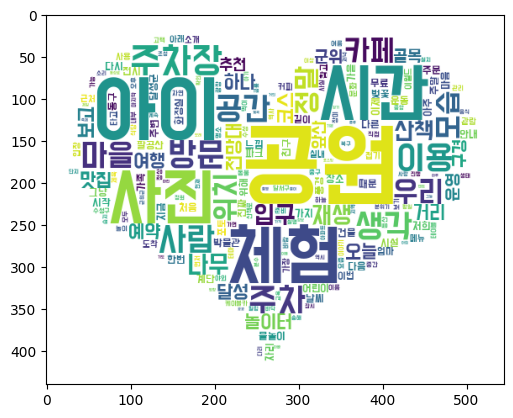

In [24]:
wc = WordCloud(background_color='white', font_path='BMDOHYEON_ttf.ttf', mask = img)
cloud = wc.generate_from_frequencies(wordsDict) 
plt.imshow(cloud)
plt.show()